<a href="https://colab.research.google.com/github/chuanjiewu144/k-cluster-1/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#!pip install yfinance
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import yfinance as yfin


In [89]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [90]:
yfin.pdr_override()
from datetime import datetime

In [109]:
data_source = 'yahoo'
start_date = '2018-01-03'
end_date = '2021-12-31'

df = yfin.download(list(companies_dict.values()),start_date, end_date, auto_adjust=True)['Close']

[*********************100%***********************]  24 of 24 completed


In [110]:
df.head

<bound method NDFrame.head of                   AAPL        AMZN         AXP          BA        BAC  \
Date                                                                    
2018-01-03   40.943359   60.209999   92.389641  283.801239  26.715496   
2018-01-04   41.133541   60.479500   93.926376  282.724396  27.065128   
2018-01-05   41.601864   61.457001   94.140587  294.322327  27.190636   
2018-01-08   41.447338   62.343498   93.274437  295.570709  27.002373   
2018-01-09   41.442596   62.634998   93.619041  303.461517  27.136843   
...                ...         ...         ...         ...        ...   
2021-12-23  175.262802  171.068497  161.527832  204.220001  43.409248   
2021-12-27  179.289459  169.669495  161.724579  203.169998  43.624245   
2021-12-28  178.255447  170.660995  161.744263  206.130005  43.682880   
2021-12-29  178.344925  169.201004  161.173676  203.660004  43.614475   
2021-12-30  177.171738  168.644501  161.498306  202.710007  43.516747   

                   C

In [113]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [115]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns = df.pct_change().mean() * 252
returns = pd.DataFrame(returns)

returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std() * sqrt(252)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
cleaned_data

array([[ 0.42178168,  0.32907786],
       [ 0.30701446,  0.31203859],
       [ 0.21106913,  0.3804645 ],
       [ 0.05042579,  0.51926094],
       [ 0.18775092,  0.36231756],
       [ 0.08997703,  0.36281215],
       [ 0.23719707,  0.40167374],
       [ 0.01650895,  0.45609352],
       [ 0.00648741,  0.25893653],
       [ 0.05760589,  0.28387114],
       [ 0.13059773,  0.37807373],
       [ 0.10128588,  0.21666046],
       [ 0.12163171,  0.22064754],
       [ 0.0877126 ,  0.27107953],
       [ 0.27498044,  0.33433371],
       [ 0.16506021,  0.24997217],
       [ 0.40070539,  0.29856474],
       [ 0.11307622,  0.28239007],
       [ 0.15212842,  0.22853432],
       [ 0.11038984,  0.21654665],
       [ 0.21927465,  0.32525906],
       [ 0.10828331,  0.48762713],
       [-0.00168465,  0.339653  ],
       [ 0.02321114,  0.33509799]])

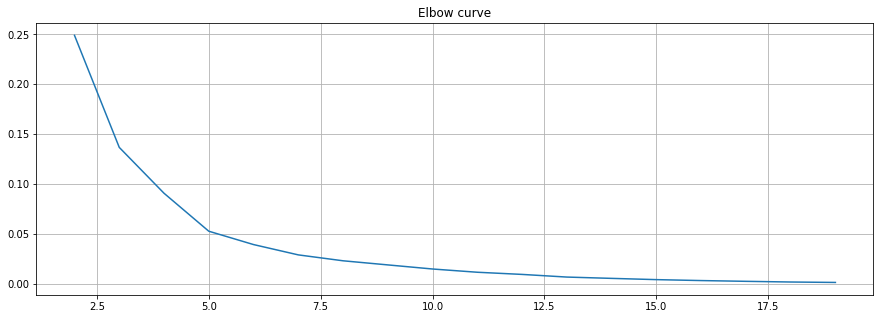

In [116]:
from sklearn.cluster import KMeans
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [117]:
#the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 5

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(cleaned_data,5)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
 
data = cleaned_data

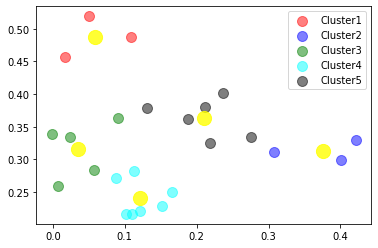

In [122]:
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.5)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.5)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.5)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.5)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

In [119]:
#Finally to get the details of which stock is actually in which cluster we can run the following line 
# of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [121]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.head(n=24)
list1=list(df['Cluster'==1])

,Stock Symbol,Cluster
0,AAPL,1
1,AMZN,1
2,AXP,4
3,BA,0
4,BAC,4
5,CVX,2
6,F,4
7,GE,0
8,HMC,2
9,IBM,2


In [137]:
print(df[df['Cluster']==1])
print(df[df['Cluster']==2])
print(df[df['Cluster']==3])
print(df[df['Cluster']==4])
print(df[df['Cluster']==0])

   Stock Symbol  Cluster
0          AAPL        1
1          AMZN        1
16         MSFT        1
   Stock Symbol  Cluster
5           CVX        2
8           HMC        2
9           IBM        2
22          WBA        2
23          XOM        2
   Stock Symbol  Cluster
11          JNJ        3
12           KO        3
13          LMT        3
15          MCD        3
17          NOC        3
18          PEP        3
19           TM        3
   Stock Symbol  Cluster
2           AXP        4
4           BAC        4
6             F        4
10         INTC        4
14           MA        4
20          TXN        4
   Stock Symbol  Cluster
3            BA        0
7            GE        0
21          VLO        0
